# Latihan Studi Kasus Regresi

## Data Loading

In [ ]:
import pandas as pd 

df_train = pd.read_csv("content/playground-series-s4e5/train.csv")

df_train

In [ ]:
df_test = pd.read_csv("content/playground-series-s4e5/test.csv")

df_test

## Data Cleaning dan Transformation

In [ ]:
df_train.info()

In [ ]:
df_train.describe(include="all")

In [ ]:
missing_values = df_train.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in df_train.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_train[feature])
    plt.title(f'Box Plot of {feature}')
    # plt.show()



In [ ]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3-Q1

condition = ~((df_train < (Q1 - 1.5*IQR)) | (df_train > (Q3 + 1.5*IQR))).any(axis=1)
df = df_train.loc[condition, df_train.columns]

In [ ]:
for feature in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    # plt.show()

In [ ]:
df_temp = df.copy()

df_temp

In [ ]:
for feature in df_temp.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(x=df_temp[feature],kde=True)
    plt.title(f'Histplot of {feature} before standardization')
    # plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features = df.select_dtypes(include=['number']).columns
numeric_features

In [ ]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
for feature in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(x=df[feature],kde=True)
    plt.title(f'Histplot of {feature} after standardization')
    # plt.show()

In [ ]:
for feature in (df.columns):
    fig, axes = plt.subplots(1,2,figsize=(10,6))
    sns.histplot(x=df_temp[feature],kde=True, ax=axes[0])
    axes[0].set_title(f'Histplot of {feature} before standardization')
    sns.histplot(x=df[feature],kde=True, ax=axes[1])
    axes[1].set_title(f'Histplot of {feature} after standardization')
    plt.tight_layout()
    plt.show()

In [ ]:
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

In [ ]:
df.describe(include='all')

In [ ]:
num_vars = df.shape[1]

print(num_vars)

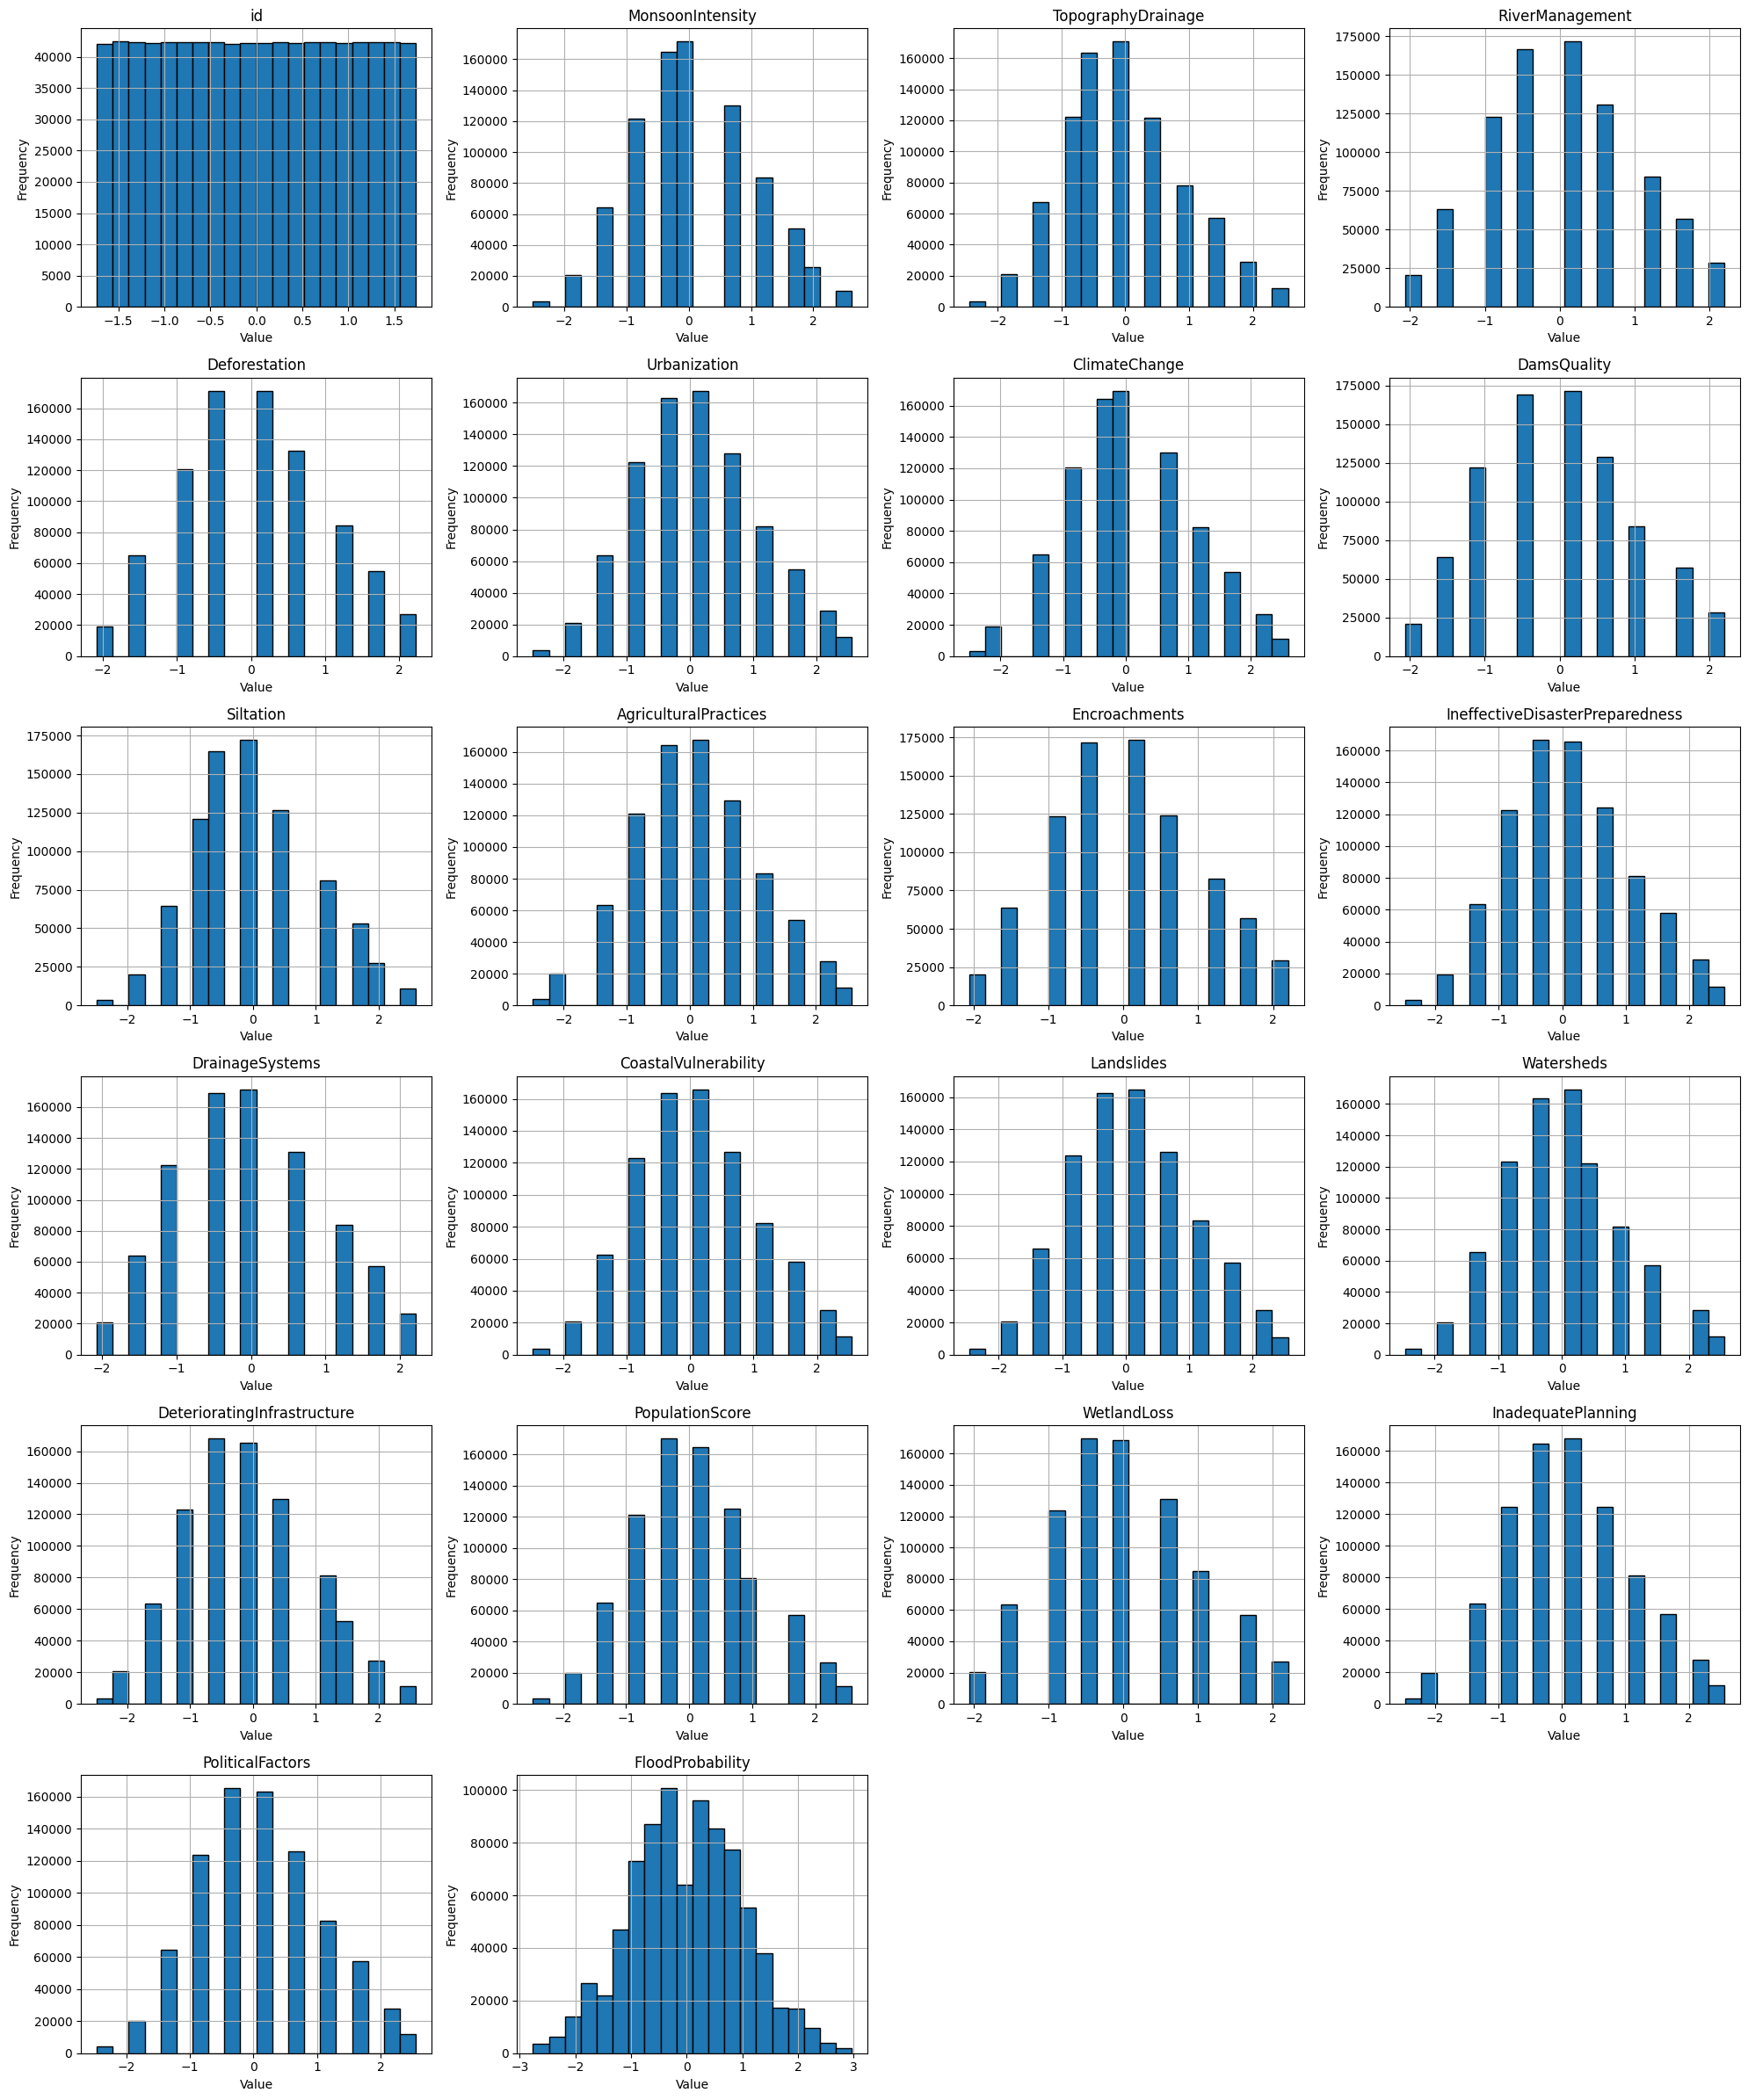

In [29]:
n_cols = 4
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows,n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])




plt.tight_layout()
plt.show()

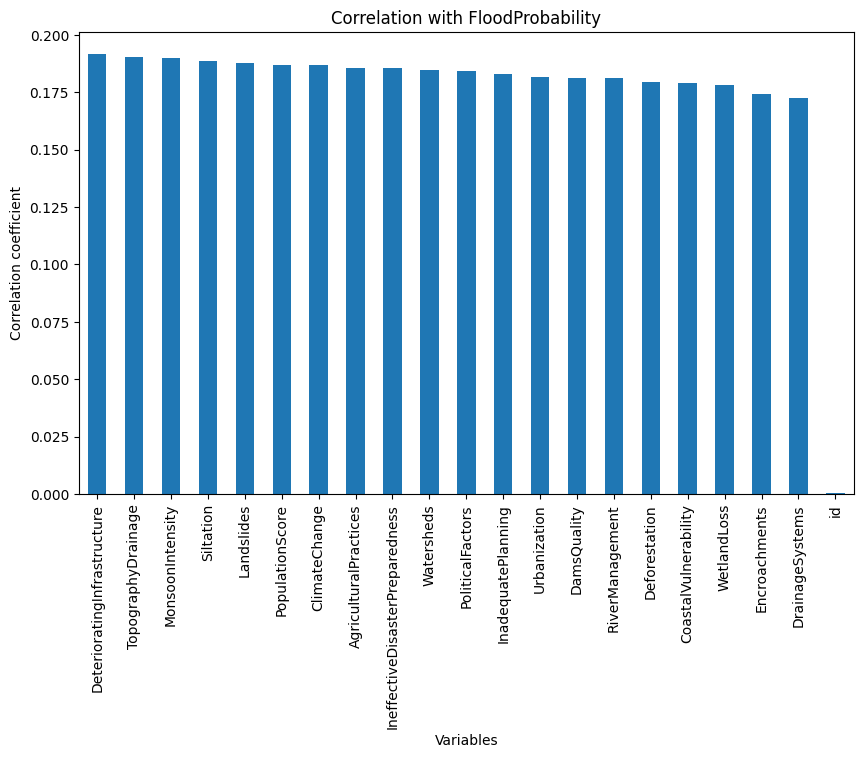

Heres my output: 
DeterioratingInfrastructure        0.191663
TopographyDrainage                 0.190517
MonsoonIntensity                   0.189866
Siltation                          0.188480
Landslides                         0.187930
PopulationScore                    0.186834
ClimateChange                      0.186776
AgriculturalPractices              0.185599
IneffectiveDisasterPreparedness    0.185390
Watersheds                         0.184573
PoliticalFactors                   0.184039
InadequatePlanning                 0.182918
Urbanization                       0.181551
DamsQuality                        0.181393
RiverManagement                    0.181004
Deforestation                      0.179304
CoastalVulnerability               0.179079
WetlandLoss                        0.178002
Encroachments                      0.174129
DrainageSystems                    0.172513
id                                 0.000287
dtype: float64


In [43]:
target_corr = df['FloodProbability']
var_corr = df.drop(columns=['FloodProbability'])

correlation = var_corr.corrwith(target_corr)

# correlation

correlation_sorted = correlation.abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))

correlation_sorted.plot(kind='bar')
plt.title(f'Correlation with FloodProbability')
plt.xlabel('Variables')
plt.ylabel('Correlation coefficient')
plt.show()

print("Heres my output: ")
print(correlation_sorted)

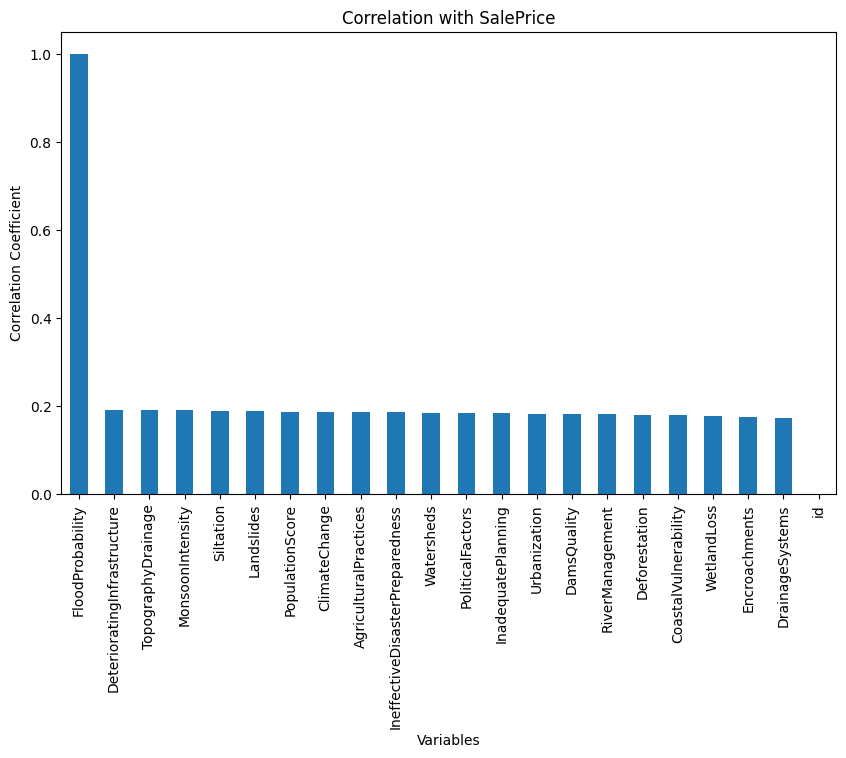

Modul's output
FloodProbability                   1.000000
DeterioratingInfrastructure        0.191663
TopographyDrainage                 0.190517
MonsoonIntensity                   0.189866
Siltation                          0.188480
Landslides                         0.187930
PopulationScore                    0.186834
ClimateChange                      0.186776
AgriculturalPractices              0.185599
IneffectiveDisasterPreparedness    0.185390
Watersheds                         0.184573
PoliticalFactors                   0.184039
InadequatePlanning                 0.182918
Urbanization                       0.181551
DamsQuality                        0.181393
RiverManagement                    0.181004
Deforestation                      0.179304
CoastalVulnerability               0.179079
WetlandLoss                        0.178002
Encroachments                      0.174129
DrainageSystems                    0.172513
id                                 0.000287
Name: FloodProbab

In [45]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df.corr()['FloodProbability']
    
# (Opsional) Mengurutkan hasil korelasi berdasarkan kekuatan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
    
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

print("Modul's output")
print(target_corr_sorted)

In [46]:
import sklearn
from sklearn import datasets

X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  845886
Jumlah data latih:  676708
Jumlah data test:  169178


## Modeling

### LARS

In [48]:
from sklearn import linear_model

lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train,y_train)

pred_lars = lars.predict(x_test)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

print(f"MAE: {mae_lars}")
print(f"MSE: {mse_lars}")
print(f"R²: {r2_lars}")

MAE: 0.8064965862112844
MSE: 0.9982455301765661
R²: 0.0007638833508322174


In [52]:
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}
 
df_results = pd.DataFrame(data,  index=['Lars'])
df_results 

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764


In [53]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(x_train, y_train)

pred_LR = LR.predict(x_test)

mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)
 
print(f"MAE: {mae_LR}")
print(f"MSE: {mse_LR}")
print(f"R²: {r2_LR}")

MAE: 0.3291415589205064
MSE: 0.17129638555662158
R²: 0.8285336323325565


In [55]:
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171296,0.828534


In [56]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=184)

GBR.fit(x_train, y_train)

pred_GBR = GBR.predict(x_test)

mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)
 
print(f"MAE: {mae_GBR}")
print(f"MSE: {mse_GBR}")
print(f"R²: {r2_GBR}")

MAE: 0.5126715936448323
MSE: 0.38049075143226296
R²: 0.6191316771387398


In [57]:
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171296,0.828534
GradientBoostingRegressor,0.512672,0.380491,0.619132
